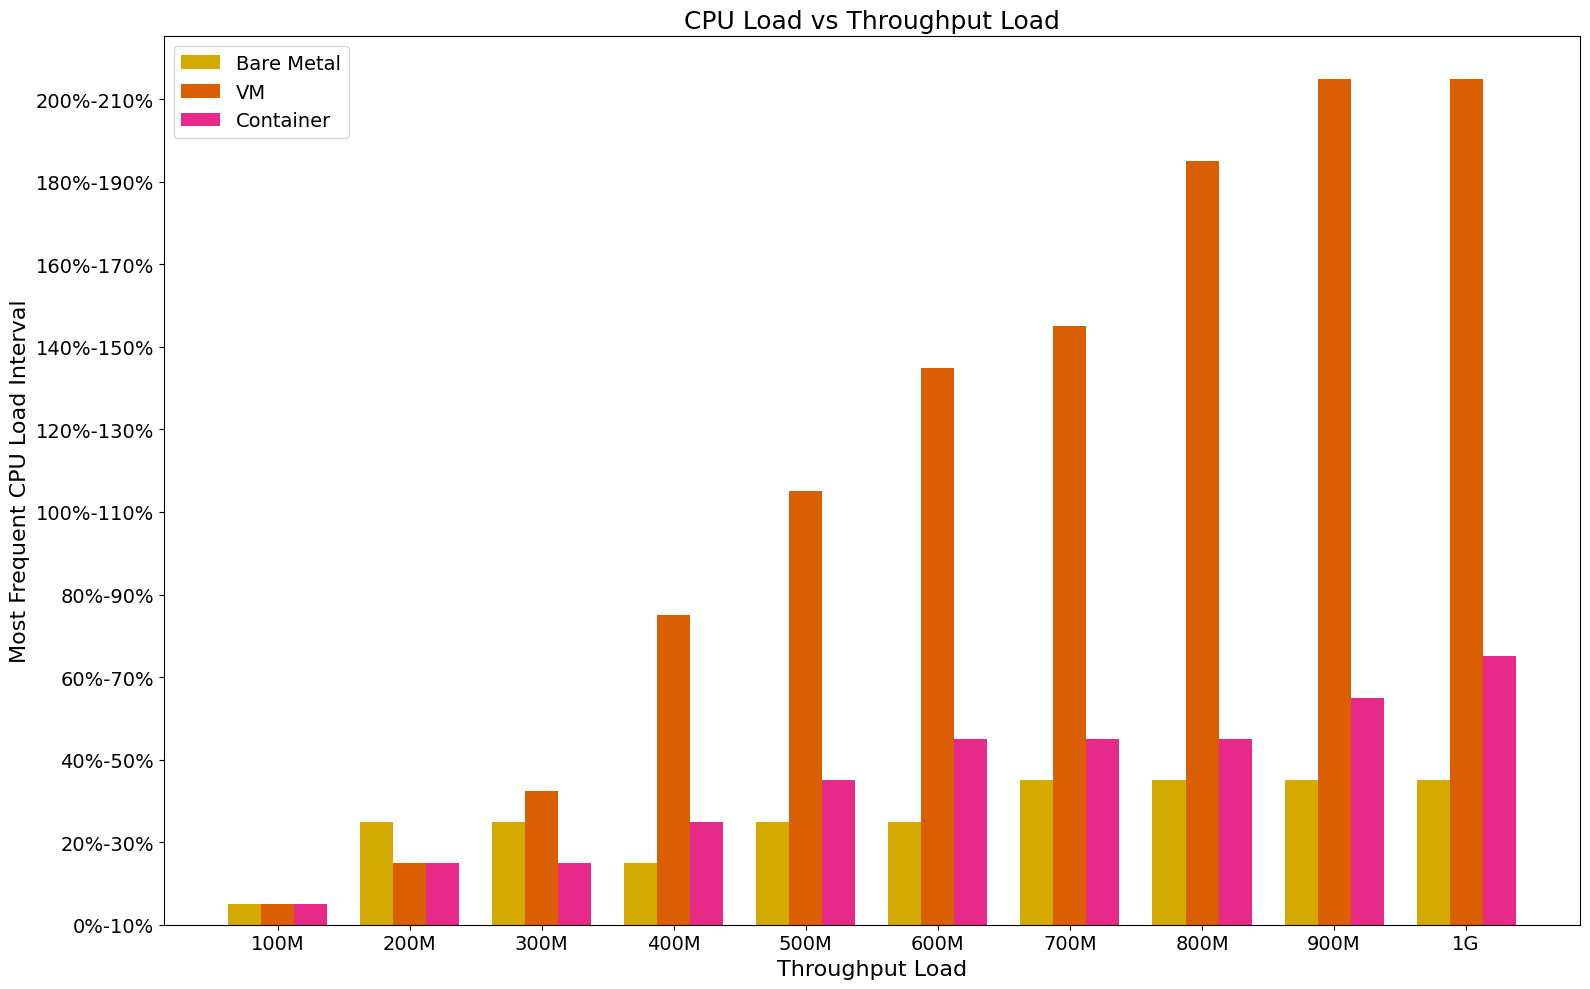

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib.ticker import FixedLocator, FixedFormatter

# X-axis labels (throughput load)
loads = ['100M', '200M', '300M', '400M', '500M', '600M', '700M', '800M', '900M', '1G']
x = np.arange(len(loads))
bar_width = 0.25

# Y-axis labels as strings
bare_metal_labels = ['0%-10%', '20%-30%', '20%-30%', '10%-20%', '20%-30%',
                     '20%-30%', '30%-40%', '30%-40%', '30%-40%', '30%-40%']
vm_labels = ['0%-10%', '10%-20%', '5%-60%', '70%-80%', '100%-110%',
             '130%-140%', '140%-150%', '180%-190%', '200%-210%', '200%-210%']
container_labels = ['0%-10%', '10%-20%', '10%-20%', '20%-30%', '30%-40%',
                    '40%-50%', '40%-50%', '40%-50%', '50%-60%', '60%-70%']

# Function to compute midpoints from interval labels
def midpoint(label):
    parts = re.findall(r'\d+', label)
    return (int(parts[0]) + int(parts[1])) / 2

# Convert labels to positions for bar plotting
bare_metal_pos = [midpoint(l) for l in bare_metal_labels]
vm_pos = [midpoint(l) for l in vm_labels]
container_pos = [midpoint(l) for l in container_labels]

# Plotting
plt.figure(figsize=(16, 10))  # Wider and taller plot
plt.bar(x - bar_width, bare_metal_pos, width=bar_width, label='Bare Metal', color='#d4aa00')
plt.bar(x, vm_pos, width=bar_width, label='VM', color='#d95f02')
plt.bar(x + bar_width, container_pos, width=bar_width, label='Container', color='#e7298a')

# Bigger labels and ticks
plt.xlabel('Throughput Load', fontsize=16)
plt.ylabel('Most Frequent CPU Load Interval', fontsize=16)
plt.title('CPU Load vs Throughput Load', fontsize=18)
plt.xticks(x, loads, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Define custom y-tick intervals (every 20%)
yticks = list(range(0, 240, 20))
ytick_labels = [f'{i}%-{i+10}%' for i in range(0, 230, 20)]

plt.gca().yaxis.set_major_locator(FixedLocator(yticks))
plt.gca().yaxis.set_major_formatter(FixedFormatter(ytick_labels))

plt.tight_layout()
plt.show()
